In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("delivery_time.csv")

In [4]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
df1=df.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'}, axis=1)

In [6]:
df1.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
df1.info

<bound method DataFrame.info of     Delivery_Time  Sorting_Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [8]:
df1.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Checking for null values

In [9]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

# checking for duplicate values

In [10]:
df[df.duplicated()].shape

(0, 2)

In [11]:
df[df.duplicated()]

,Delivery Time,Sorting Time


# Plotting the data to check the ouliers

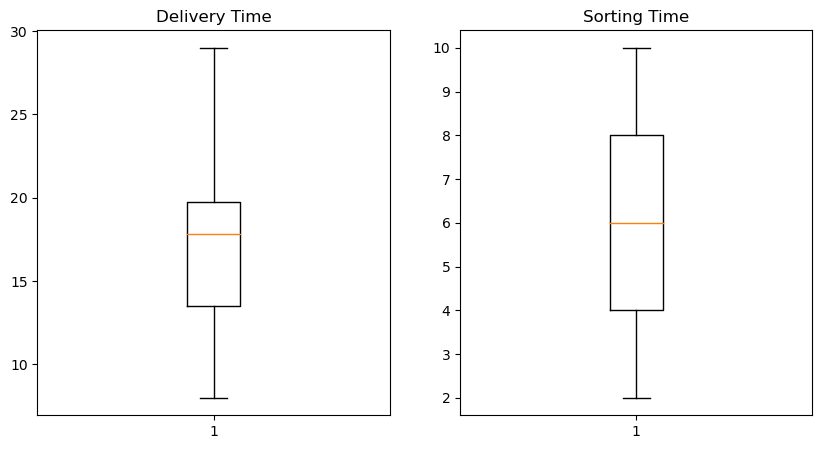

In [12]:
plt.subplots(figsize = (10,5))
plt.subplot(121)
plt.boxplot(df['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df['Sorting Time'])
plt.title('Sorting Time')
plt.show()

# Checking the correlation


In [13]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


# Checking for Homoscedasticity or Hetroscedasticity

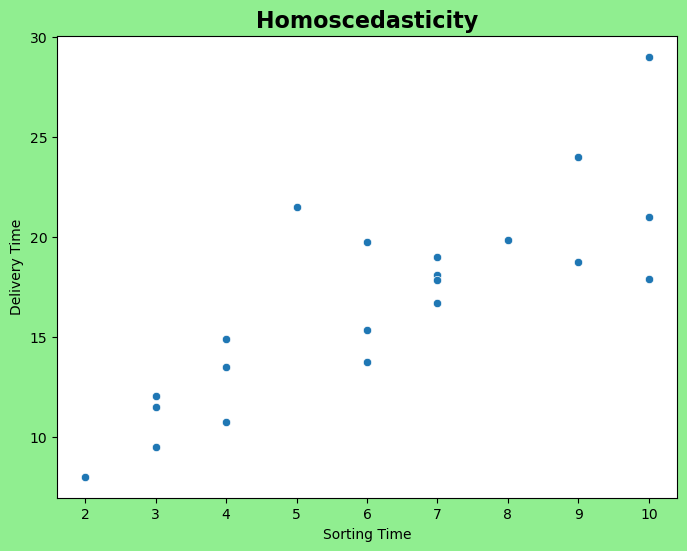

In [14]:
plt.figure(figsize=(8,6), facecolor='lightgreen')
sns.scatterplot(x=df['Sorting Time'], y=df['Delivery Time'])
plt.title('Homoscedasticity', fontweight='bold', fontsize=16)
plt.show()

In [15]:
df.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

# Feature Engineering


Text(0.5, 1.0, 'befor transformation')

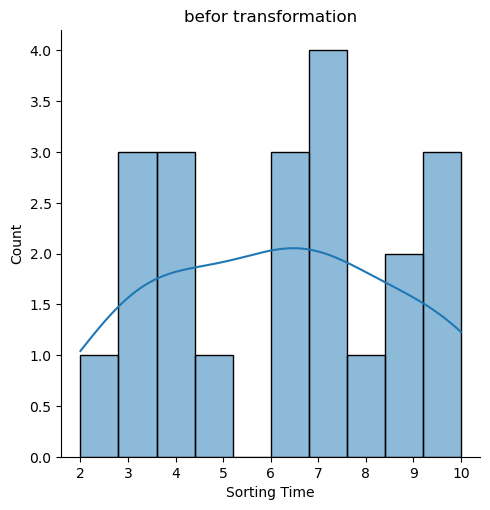

In [16]:
sns.displot(df['Sorting Time'],bins=10, kde=True)
plt.title('befor transformation')

Text(0.5, 1.0, 'After transformation')

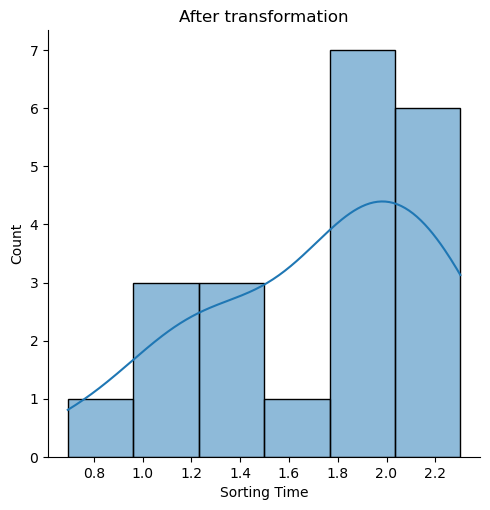

In [17]:
sns.displot(np.log(df['Sorting Time']), kde=True)
plt.title('After transformation')

Text(0.5, 1.0, 'befor transformation')

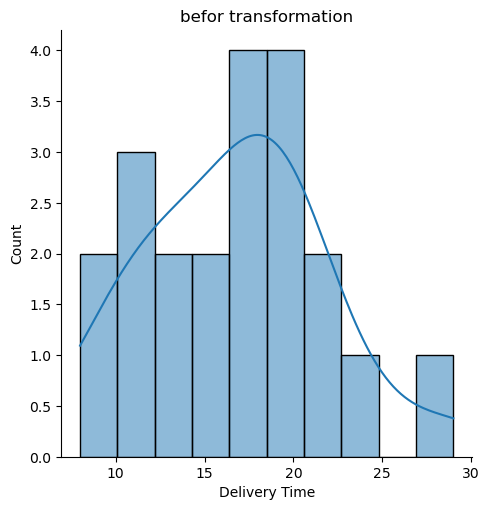

In [18]:
sns.displot(df['Delivery Time'],bins=10, kde=True)
plt.title('befor transformation')

Text(0.5, 1.0, 'After transformation')

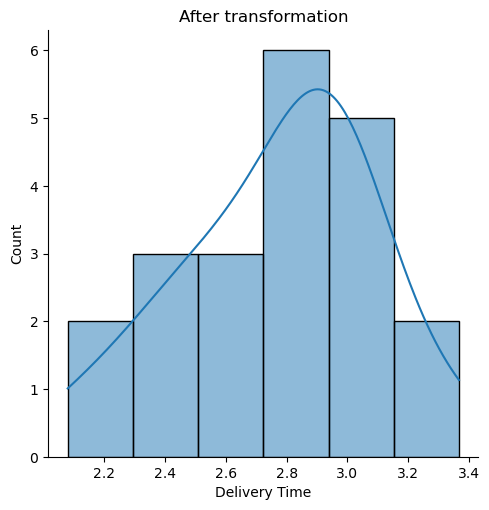

In [19]:
sns.displot(np.log(df['Delivery Time']), kde=True)
plt.title('After transformation')

# Fitting a Linear Regression Model

# Using Ordinary least squares (OLS) regression

# It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line

In [20]:
model= sm.ols('Delivery_Time~Sorting_Time', data=df1).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        18:43:00   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As you can notice in the above model

# Square Root transformation on data

In [22]:
model1 = sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Fri, 18 Aug 2023   Prob (F-statistic):           8.48e-07
Time:                            18:43:02   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Cube Root transformation on Data

In [23]:
model2 = sm.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Fri, 18 Aug 2023   Prob (F-statistic):           4.90e-07
Time:                            18:43:05   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log transformation on Data

In [24]:
model3 = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Fri, 18 Aug 2023   Prob (F-statistic):           1.60e-07
Time:                           18:43:06   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model testing

# As Y = Beta0 + Beta1*(X)

# Finding Coefficient Parameters (Beta0 and Beta1 values)

In [25]:
model.param

AttributeError: 'OLSResults' object has no attribute 'param'

# Here, (Intercept) Beta0 value = 6.58 & (Sorting Time) Beta1 value = 1.64

# Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)

# Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [26]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


# (Intercept) Beta0: tvalue=3.82 , pvalue=0.001147


# (daily) Beta1: tvalue=6.38, pvalue=0.000004


# As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(Sorting Time) variable has good slope and variance w.r.t Y(Delivery Time) variable.

# R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.

# Measure goodness-of-fit by finding rsquared values (percentage of variance)

In [27]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Determination Coefficient = rsquared value = 0.68 ; very good fit >= 85%

# `model validation

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
x=df1[['Delivery_Time']]

In [30]:
y=df1[['Sorting_Time']]

# crrate Linear Regression

In [31]:
lr=LinearRegression()

In [32]:
lr

LinearRegression()

In [33]:
lr.fit(x,y)

LinearRegression()

In [34]:
lr.score(x,y)

0.682271474841723

In [35]:
lr.intercept_

array([-0.75667337])

In [36]:
lr.coef_

array([[0.41374363]])

In [37]:
lr.predict(y)

array([[3.38076291],
       [0.89830115],
       [1.7257884 ],
       [2.96701929],
       [3.38076291],
       [1.7257884 ],
       [2.13953203],
       [0.48455752],
       [3.38076291],
       [2.96701929],
       [2.55327566],
       [0.89830115],
       [2.13953203],
       [0.48455752],
       [0.48455752],
       [0.89830115],
       [1.7257884 ],
       [2.13953203],
       [0.07081389],
       [2.13953203],
       [1.31204477]])